In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
exp_loss_time_decay = 10
Ti = np.linspace(0,10,1001)

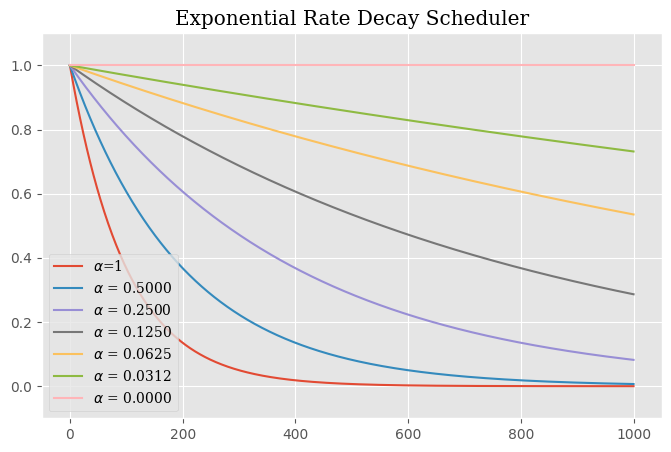

In [7]:
gamma = 0.5
steps = 6
exp_loss_time_decay = 1
precision = 4

plt.figure(figsize=(8,5))
plt.plot(np.exp(-exp_loss_time_decay*Ti),label=rf"$\alpha$={exp_loss_time_decay}")
for i in range(steps):
    if i == steps -1:
        exp_loss_time_decay = 0
    else:
        exp_loss_time_decay = exp_loss_time_decay * gamma
    label = rf"$\alpha$ = {exp_loss_time_decay:.{precision}f}"

    plt.plot(np.exp(-exp_loss_time_decay*Ti), label=label)


plt.ylim(0-0.1,1+0.1)
plt.legend(prop={'family':'serif'})
plt.title("Exponential Rate Decay Scheduler", family ='serif')
plt.show()

In [13]:
np.exp(-exp_loss_time_decay*Ti)

array([1., 1., 1., ..., 1., 1., 1.])

In [14]:
steps = 15
alphas = np.linspace(0,1,steps)[::-1]

In [15]:
alphas

array([1.        , 0.92857143, 0.85714286, 0.78571429, 0.71428571,
       0.64285714, 0.57142857, 0.5       , 0.42857143, 0.35714286,
       0.28571429, 0.21428571, 0.14285714, 0.07142857, 0.        ])

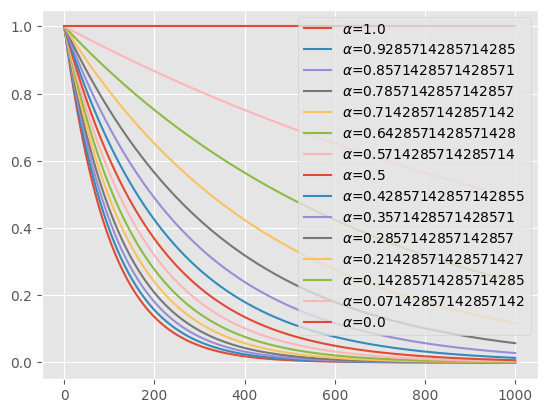

In [16]:
for alpha in alphas:
    plt.plot(np.exp(-alpha*Ti), label=rf'$\alpha$={alpha}')
plt.legend()
plt.show()

In [17]:
from stabnode.schedulers import ExpLossTimeDecayScheduler

In [23]:
exp_scheduler = ExpLossTimeDecayScheduler(init_alpha=10, gamma=0.1,_alpha_thresh=1e-2)

In [24]:
losses = [1.0/(1+0.05*i) if i < 100 else 0.2 for i in range(200)]


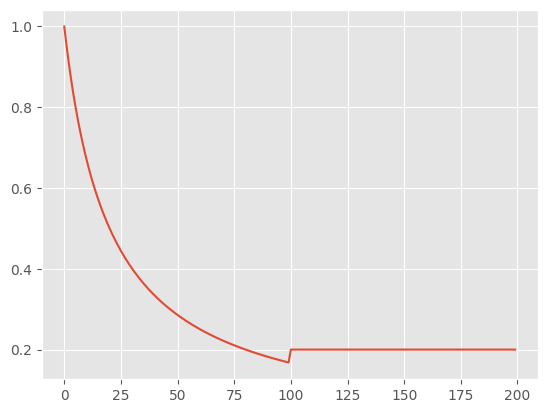

In [25]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [26]:
for loss in losses:
    exp_scheduler.step(loss)

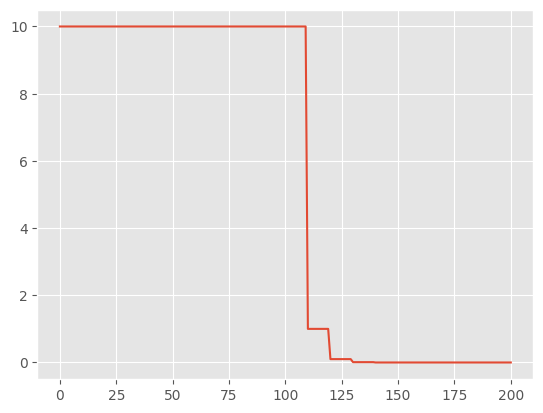

In [27]:
plt.plot(exp_scheduler.step_history)

In [28]:
exp_scheduler.alpha_history

[10, 1.0, 0.1, 0.010000000000000002, 0.0]

In [31]:
# exp_scheduler.step_history